<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [11]</a>'.</span>

In [1]:
from edc import print_info
print_info("geodb-explore")


***Notebook Title***  
GeoDB: Explore Datasets

***Notebook Description***  
Euro Data Cube GeoDB: Explore Datasets


***Notebook Dependencies***  
This notebook requires an active subscription to:
* EDC GeoDB


In [2]:
from edc import setup_environment_variables
setup_environment_variables()

API credentials have automatically been injected for your active subscriptions.  
The following environment variables are now available:
* `GEODB_API_SERVER_PORT`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_AUTH_DOMAIN`

The following additional environment variables have been loaded from `~/custom.env`:
* `AWS_BUCKET`
* `DAPA_URL`
* `DB_HOST`, `DB_NAME`, `DB_PASSWORD`, `DB_USER`
* `OGC_EDC_URL`
* `REFERENCE_DATA`


In [3]:
from edc import check_compatibility
check_compatibility("user-0.19.6")

This notebook is compatible with this base image version (user-0.19.6).

## Exploring Data




In [4]:
from xcube_geodb.core.geodb import GeoDBClient

In [5]:
geodb = GeoDBClient()

### Get your user name

In [6]:
geodb.whoami

'geodb_418dfeac-15f0-4606-9edb-fd9eb722bf04'

### List Datasets

__Step 1__: List all datasets a user has access to.

In [7]:
geodb.get_my_usage() # to be updated so that all available collections are displayed includign sensible information ont heir availability, e.g. public, purchased, etc..

{'usage': None}

In [8]:
geodb.get_my_collections()

,table_name
0,land_use


__Step 2__: Let's get the whole content of a particular data set.

In [9]:
gdf = geodb.get_collection('land_use', database='geodb_admin') # to be updated, so that namespace is not needed or something more suitable, e.g. 'public'
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-08-21T11:56:35.961115+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,2,2020-08-21T11:56:35.961115+00:00,None,"POLYGON ((453810.376 91150.199, 453812.552 911...",4770325,1300,2019-03-26
2,3,2020-08-21T11:56:35.961115+00:00,None,"POLYGON ((456099.635 97696.070, 456112.810 976...",2305689,7000,2019-02-25
3,4,2020-08-21T11:56:35.961115+00:00,None,"POLYGON ((455929.405 97963.785, 455933.284 979...",2305596,1100,2019-02-25
4,5,2020-08-21T11:56:35.961115+00:00,None,"POLYGON ((461561.512 96119.256, 461632.114 960...",2310160,1100,2019-03-11
...,...,...,...,...,...,...,...
9822,9823,2020-08-21T11:56:35.961115+00:00,None,"POLYGON ((460637.334 96865.891, 460647.927 969...",6253989,1600,2019-03-08
9823,9824,2020-08-21T11:56:35.961115+00:00,None,"POLYGON ((459467.868 96839.686, 459467.770 968...",6252044,1600,2019-03-26
9824,9825,2020-08-21T11:56:35.961115+00:00,None,"POLYGON ((459488.998 94066.248, 459498.145 940...",6245985,2000,2019-04-08
9825,9826,2020-08-21T11:56:35.961115+00:00,None,"POLYGON ((459676.680 94000.000, 459672.469 939...",6245986,2000,2019-02-20


__Step 3__: Plot the GeoDataframe, select a reasonable column to diplay

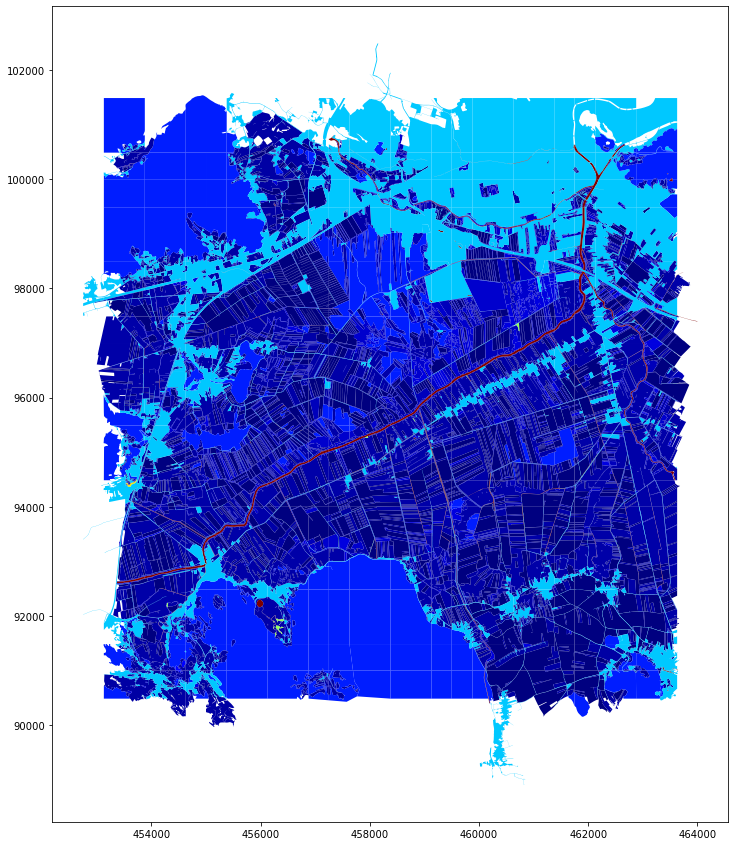

In [10]:
gdf.plot(column="raba_id", figsize=(15,15), cmap = 'jet')

__Step 5__: Subselect the data. Here: Select a specific use by defining an ID value to choose 

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [11]:
gdfsub = geodb.get_collection('land_use', database='geodb_test99', query='raba_id=eq.1410')
gdfsub.head()

GeoDBError: permission denied for relation geodb_test99_land_use

In [ ]:
gdfsub.plot(column="raba_id", figsize=(15,15), cmap = 'jet')

__Step 6__: Filter by bbox, limit it to 200 entries

In [ ]:
gdf = geodb.get_collection_by_bbox(collection="land_use", database='geodb_test99', bbox = (452750.0, 88909.549, 464000.0, 102486.299), comparison_mode="contains", bbox_crs=3794, limit=200, offset=10)
gdf

In [ ]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')

__Step 6__: Fltering using PostGres Syntax; see https://www.postgresql.org/docs/9.1/index.html for details

In [ ]:
gdf = geodb.get_collection_pg(collection='land_use', database='geodb_test99', where='raba_id=1410')
gdf.head()

In [ ]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')

__Step 7__: Fltering using PostGres Syntax Allowing Aggregation
Here according to data, note that the data set has been reduced to 200 entries above

In [ ]:
df = geodb.get_collection_pg('land_use', database='geodb_test99', where='raba_id=1410', group='d_od', select='COUNT(d_od) as ct, d_od')
df.head()